# Greedy SPCA

In [1]:
import numpy as np
from joblib import delayed, Parallel

In [2]:
def spca_greedy(orig_matrix, sparsity_level):
    set_N, indices = set(range(orig_matrix.shape[0])),[]
    ret = 0
    for level in range(sparsity_level):
        for idx in list(set_N - set(indices)):
            tmp_ret = np.linalg.norm(orig_matrix[indices+[idx]][:, indices+[idx]], ord=2)
            if tmp_ret>=ret:
                ret = tmp_ret
                new_indices = indices + [idx]
        indices = new_indices
    return ret

In [6]:
def main_dim():
    K, n_samples = 30, 10000
    random_state = 42
    np.random.seed(random_state)

    n_dims_list = [2,5,10,20]
    results = {}
    
    for n_dims in n_dims_list:
        results[n_dims] = []

    for p in tqdm(n_dims_list):
        D = np.random.randn(K, p)
        D /= np.linalg.norm(D, axis=1, ord=2, keepdims=True)
        B = D.dot(D.T)

        L = np.linalg.norm(B, ord=2)
        B /= L
    
        for k in range(1, K+1):
            print(f"\rComputing k-SPCA bounds: {(k-1) / K:7.2%}")
            L_S = spca_greedy(B,k)
            if k>1:
                L_S = max(L_S, results[p][-1])
            results[p].append(L_S)
    return results

In [7]:
results_n_dims = main_dim()

  0%|          | 0/4 [00:00<?, ?it/s]

Computing k-SPCA bounds:   0.00%
Computing k-SPCA bounds:   3.33%
Computing k-SPCA bounds:   6.67%
Computing k-SPCA bounds:  10.00%
Computing k-SPCA bounds:  13.33%
Computing k-SPCA bounds:  16.67%
Computing k-SPCA bounds:  20.00%
Computing k-SPCA bounds:  23.33%
Computing k-SPCA bounds:  26.67%
Computing k-SPCA bounds:  30.00%
Computing k-SPCA bounds:  33.33%
Computing k-SPCA bounds:  36.67%
Computing k-SPCA bounds:  40.00%
Computing k-SPCA bounds:  43.33%
Computing k-SPCA bounds:  46.67%
Computing k-SPCA bounds:  50.00%
Computing k-SPCA bounds:  53.33%
Computing k-SPCA bounds:  56.67%
Computing k-SPCA bounds:  60.00%
Computing k-SPCA bounds:  63.33%
Computing k-SPCA bounds:  66.67%
Computing k-SPCA bounds:  70.00%
Computing k-SPCA bounds:  73.33%
Computing k-SPCA bounds:  76.67%
Computing k-SPCA bounds:  80.00%
Computing k-SPCA bounds:  83.33%
Computing k-SPCA bounds:  86.67%
Computing k-SPCA bounds:  90.00%
Computing k-SPCA bounds:  93.33%
Computing k-SPCA bounds:  96.67%
Computing 

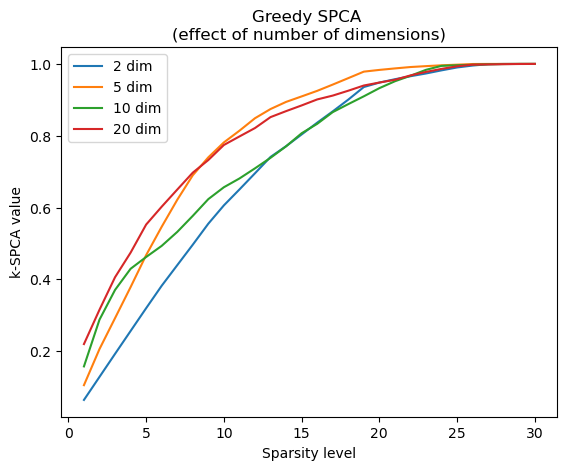

In [8]:
import matplotlib.pyplot as plt
plt.title("Greedy SPCA \n(effect of number of dimensions)")
for n_sample in list(results_n_dims.keys()):
    plt.plot(range(1, 30+1), results_n_dims[n_sample], label = str(n_sample)+' dim')
plt.legend()
plt.xlabel("Sparsity level")
plt.ylabel("k-SPCA value")
plt.savefig("number_of_dims_greedy.png")
plt.show()